# Analyzing CIA Factbook Data Using SQL

In [3]:
import pandas as pd
import sqlite3
conn = sqlite3.connect("factbook.db")
q = "select * from sqlite_master WHERE type='table';"
pd.read_sql_query(q,conn)


,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [27]:
#overview of the data
q1 = "select * from facts limit 5"
pd.read_sql_query(q1,conn)
#df = pd.read_sql_query("select * from facts limit 5",conn)
#df

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


In [35]:
# summary statistics
q2 = "SELECT MIN(population) min_pop, MAX(population) max_pop, MIN(population_growth) min_pop_growth, MAX(population_growth) max_pop_growth FROM facts"
pd.read_sql_query(q2,conn)



,min_pop,max_pop,min_pop_growth,max_pop_growth
0,0,7256490011,0.0,4.02


From above,maximum population is over 7 billion while the minimum population of 0 seems to be an outlier

In [32]:
#finding outliers
q3 = "select * from facts where population == (select min(population) from facts)"
pd.read_sql_query(q3,conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,250,ay,Antarctica,None,280000,None,0,None,None,None,None


In [ ]:
Antartica is the country with a population of 0

In [7]:
q4 = "select * from facts where population == (select max(population) from facts)"
pd.read_sql_query(q4,conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None


A country named 'World' has the most population

In [44]:
q = "select * from facts where population_growth == (select max(population_growth) from facts)"
pd.read_sql_query(q,conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,162,od,South Sudan,644329,None,None,12042910,4.02,36.91,8.18,11.47


South Sudan appears to have the highest percentage of population growth

In [34]:
#exploring average population and Area
q5 = "select avg(population) avg_population,avg(area) avg_area from facts"
pd.read_sql_query(q5,conn)

,avg_population,avg_area
0,6.209493e+07,555093.546185


In [36]:
#finding densely populated countries
q6 = "select name,area,population from facts where population > (select avg(population) from facts) AND area < (select avg(area) from facts)"
pd.read_sql_query(q6,conn)

,name,area,population
0,Bangladesh,148460,168957745
1,Germany,357022,80854408
2,Japan,377915,126919659
3,Philippines,300000,100998376
4,Thailand,513120,67976405
5,United Kingdom,243610,64088222
6,Vietnam,331210,94348835


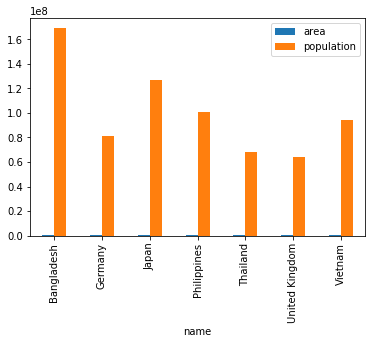

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_sql_query(q6,conn)
df.plot(x = 'name', kind='bar')
plt.show()

The table and graph above shows that Bangladesh is the most densely populated country.

In [37]:
q7 = "select name,birth_rate,death_rate from facts where death_rate > birth_rate"
pd.read_sql_query(q7,conn)

,name,birth_rate,death_rate
0,Austria,9.41,9.42
1,Belarus,10.70,13.36
2,Bosnia and Herzegovina,8.87,9.75
3,Bulgaria,8.92,14.44
4,Croatia,9.45,12.18
5,Czech Republic,9.63,10.34
6,Estonia,10.51,12.40
7,Germany,8.47,11.42
8,Greece,8.66,11.09
9,Hungary,9.16,12.73


In [40]:
q8 = "select name,area_land,area_water,cast(area_water as float)/cast(area_land as float) water_land_ratio from facts where area_water > area_land"
pd.read_sql_query(q8,conn)

,name,area_land,area_water,water_land_ratio
0,British Indian Ocean Territory,60,54340,905.666667
1,Virgin Islands,346,1564,4.520231


British Indian Ocean Territory has the highest ratio of water to land